## Chessboard Detection from Screenshot

In this notebook we show step by step how to detect and extract a chessboard from an image, assuming the image contains exactly one chessboard.

At the moment the algorithm has been tested only on two screenshots from chess.com and one screenshot from lichess.com. It currently fails for unconvential chessboard themes (see e.g. images/chesscom_3.png).

#### Workflow
1) Convert image to grayscale;
2) Find (by trial & error) a threshold pixel value (between 0 and 225) for which the light and dark squares appear as white and black on the thresholded image;
3) Use openCV's `findChessboardCornersSB` to identify the coordinates of the chessboard's four corners;
4) Crop out the chessboard;
5) TODO: scale the chessboard to 400*400 pixels (or maybe do this directly in Keras?).

In [1]:
import os
import math
from PIL import Image
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

PROJECT_DIR = os.path.dirname(os.getcwd())

# Select between lichess and chesscom images

img_no = 1

# img_name = "lichess_" + str(img_no)
img_name = "chesscom_" + str(img_no)

load_path = os.path.join(PROJECT_DIR, "images", img_name + ".png")

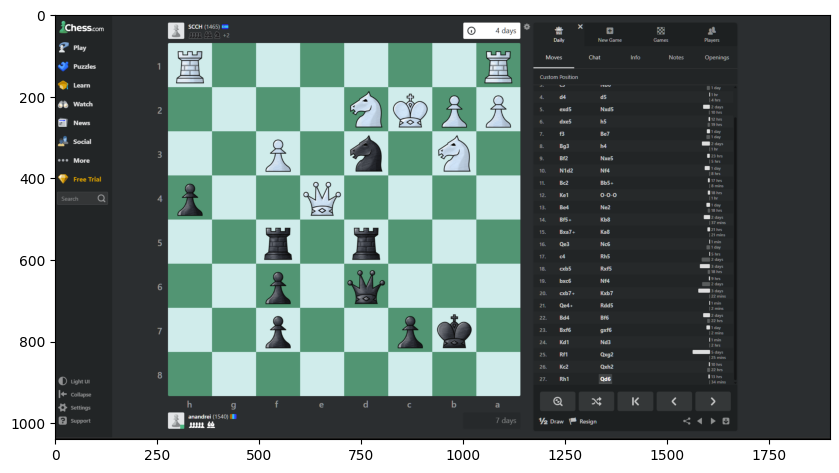

In [11]:
# Load the image
img = cv.imread(load_path)
# Convert to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Set figure size globally
plt.rcParams["figure.figsize"] = (10,6)


plt.imshow(img)
plt.show()

### Binary thresholding + findChessboardCornersSB

...seems to work for simple cases. TODO: design an algorithm that finds a threshold such that the black & white chessboard can be detected by the openCV `findChessboardCornersSB` function.

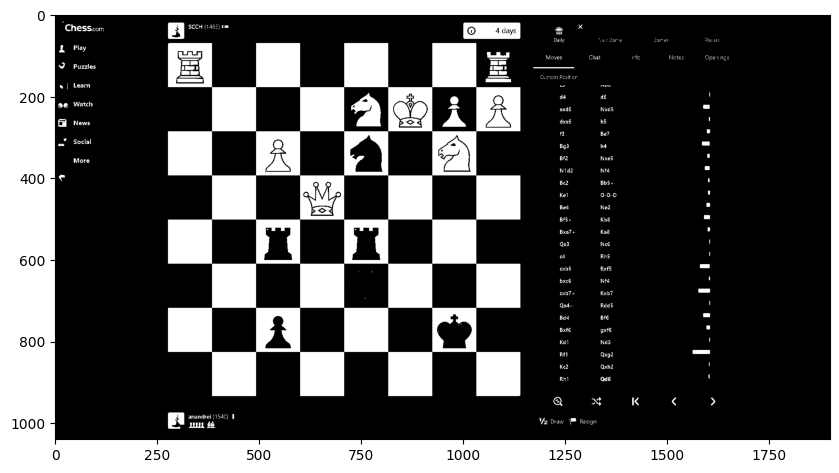

In [24]:
# Example of binary thresholding of a grayscale image

def apply_binary_threshold(img, thr):
    _, output = cv.threshold(
        src=gray,  # source image
        thresh=175,  # threshold value
        maxval=255,  # maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types
        type=cv.THRESH_BINARY  # thresholding type
    )

    return output

output = apply_binary_threshold(gray, thr=175)

plt.imshow(output, cmap="gray")
plt.show()

`findChessboardCornersSB` can only find the corners of the "inner" 6x6 chessboard. To find the corners of the full board, we first calculate the side of the square (in pixels) and extend the 6x6 board accordingly.

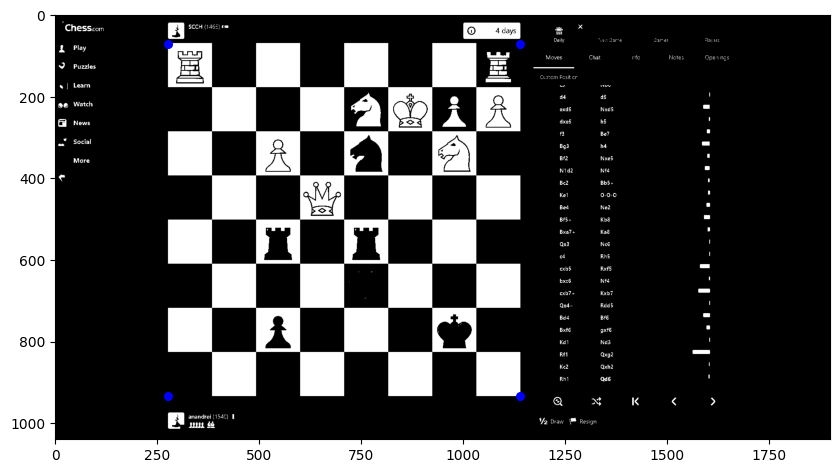

In [ ]:
# Find the chessboard corners 

def find_chessboard_corners(img):
    
    found, points = cv.findChessboardCornersSB(
        image=img,
        patternSize=(7, 7),
        flags=cv.CALIB_CB_NORMALIZE_IMAGE + cv.CALIB_CB_EXHAUSTIVE 
    )  # points[-1, 0, :] is bottom right, points[0, 0, :] is top left

    if not found:
        return None

    right, bottom = points[-1, 0, :]
    left, top = points[0, 0, :]
    # Side of the square
    square = 0.5 * (right-left + bottom-top)/6
    
    right = int(right+square)
    left = int(left-square)
    top = int(top-square)
    bottom = int(bottom+square)

    return left, right, top, bottom


points = find_chessboard_corners(output)

if points:
    left, right, top, bottom = points
    
    plt.imshow(output, cmap="gray")
    # plt.scatter(points[:, 0, 0], points[:, 0, 1], c="blue", s=10)
    plt.scatter([left, right, left, right], [bottom, top, top, bottom], c="blue", s=30)
    plt.show()


In [ ]:
# Function for trying several thresholds until a functioning one is found

def crop_chessboard(img):
    # TODO
    pass

(864, 864, 3)


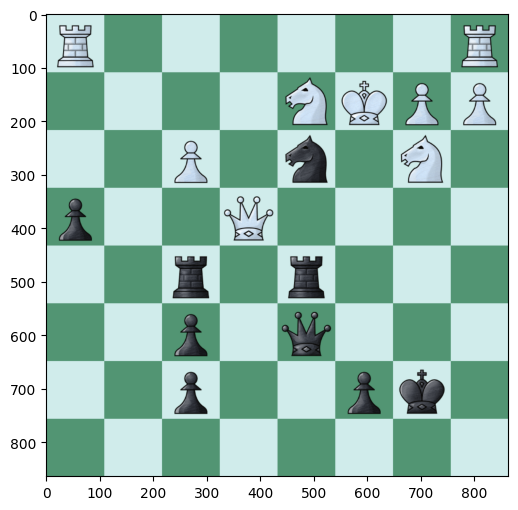

In [33]:
# Crop the image

cropped = img[top:bottom, left:right]

print(cropped.shape)

plt.imshow(cropped)
plt.show()